In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import read_image
import os
import radiometric_calibration
load_dotenv()

True

In [2]:
image_pol = os.getenv('HH_tif_path')
dataframe = os.getenv('Input_csv_path')
img = radiometric_calibration.apply_radio_cal(cr_length = 2.4384 , image_path = image_pol, input_csv_path = dataframe)
np.save('img-1.npy',img)

Calibration Progress: 100%|██████████| 9000000/9000000 [00:08<00:00, 1101005.39 pixels/s]


Executed in 13.09 seconds.


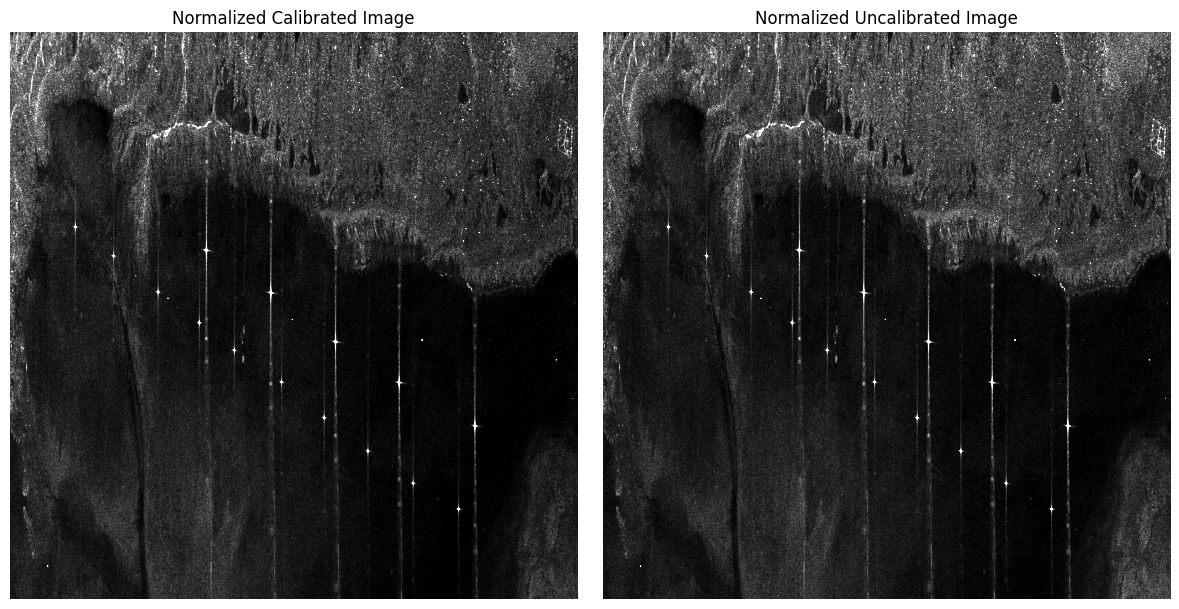

In [4]:
# Load the calibrated image
cal = np.abs(np.load(r'C:\Users\Vision IAS\Desktop\work\SAR\img-1.npy'))

# Normalize the calibrated image
normalized_cal = (cal - np.min(cal)) / (np.max(cal) - np.min(cal))

# Load the uncalibrated image
uncal = np.abs(read_image.image_array(os.getenv('HH_tif_path')))
normalized_uncal = (uncal - np.min(uncal)) / (np.max(uncal) - np.min(uncal))

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the normalized calibrated image
axs[0].imshow(normalized_cal, cmap='gray', vmin=0.0001, vmax=0.002)
axs[0].axis('off')  # Hide axis
axs[0].set_title('Normalized Calibrated Image')

# Display the normalized uncalibrated image
axs[1].imshow(normalized_uncal, cmap='gray', vmin=0.0001, vmax=0.002)
axs[1].axis('off')  # Hide axis
axs[1].set_title('Normalized Uncalibrated Image')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
